In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv', parse_dates=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day']= train['datetime'].dt.day
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


datetime - hourly date + timestamp

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather 

          1: Clear, Few clouds, Partly cloudy, Partly cloudy
          
          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
          
          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
          
          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [7]:
round(train.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.51,1.12,1.00,2.00,3.00,4.00,4.00
holiday,10886.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,10886.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,10886.0,1.42,0.63,1.00,1.00,1.00,2.00,4.00
temp,10886.0,20.23,7.79,0.82,13.94,20.50,26.24,41.00
atemp,10886.0,23.66,8.47,0.76,16.66,24.24,31.06,45.46
humidity,10886.0,61.89,19.25,0.00,47.00,62.00,77.00,100.00
windspeed,10886.0,12.80,8.16,0.00,7.00,13.00,17.00,57.00
casual,10886.0,36.02,49.96,0.00,4.00,17.00,49.00,367.00
registered,10886.0,155.55,151.04,0.00,36.00,118.00,222.00,886.00


<AxesSubplot:>

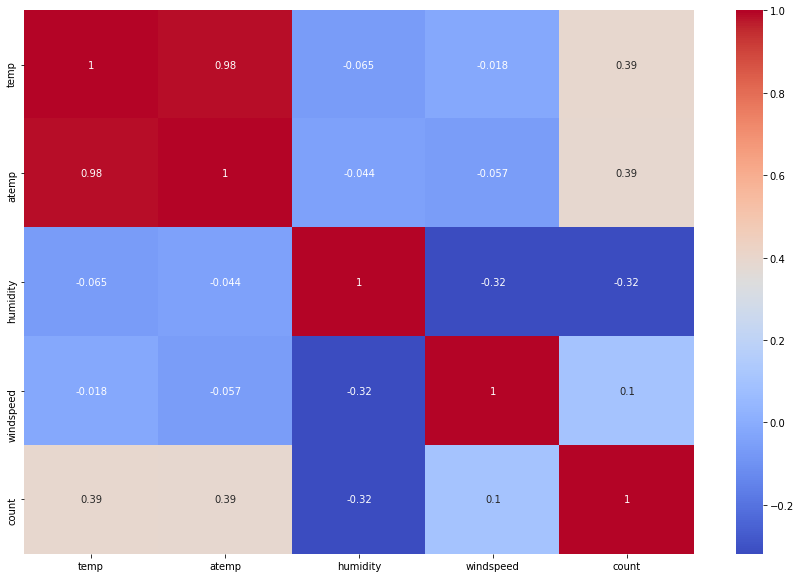

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(train[['temp','atemp','humidity','windspeed','count']].corr(), annot=True, cmap='coolwarm')

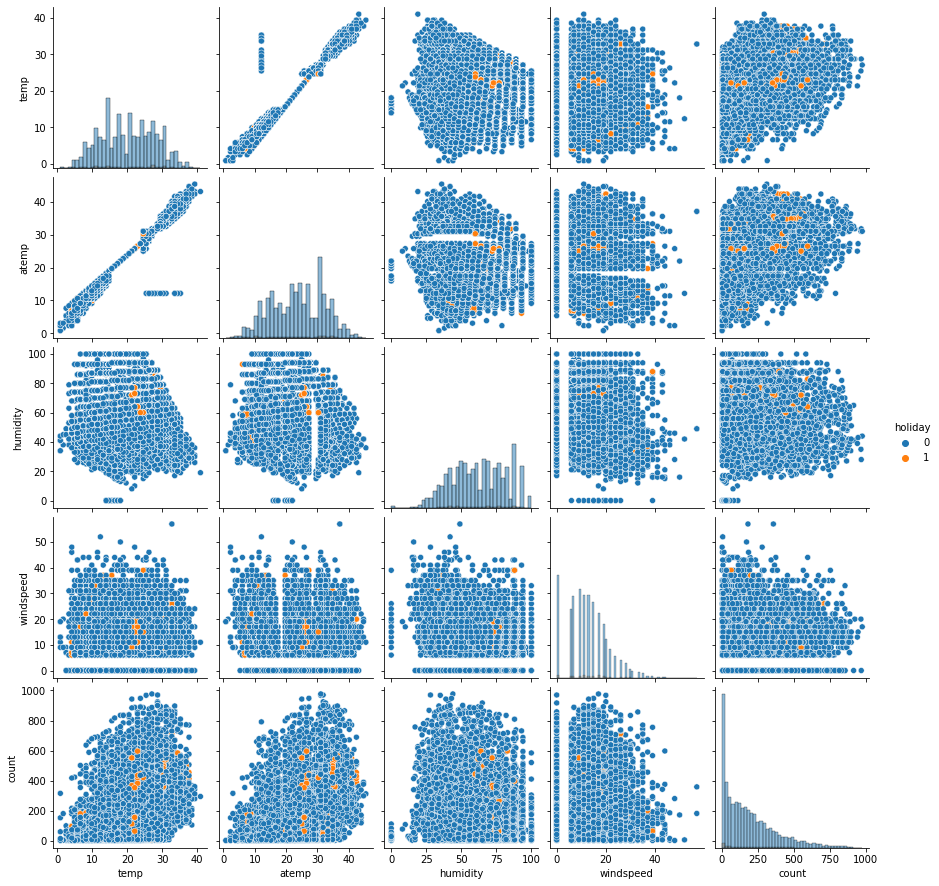

In [14]:
sns.pairplot(train[['holiday', 'temp','atemp','humidity','windspeed','count']], hue="holiday", diag_kind="hist")

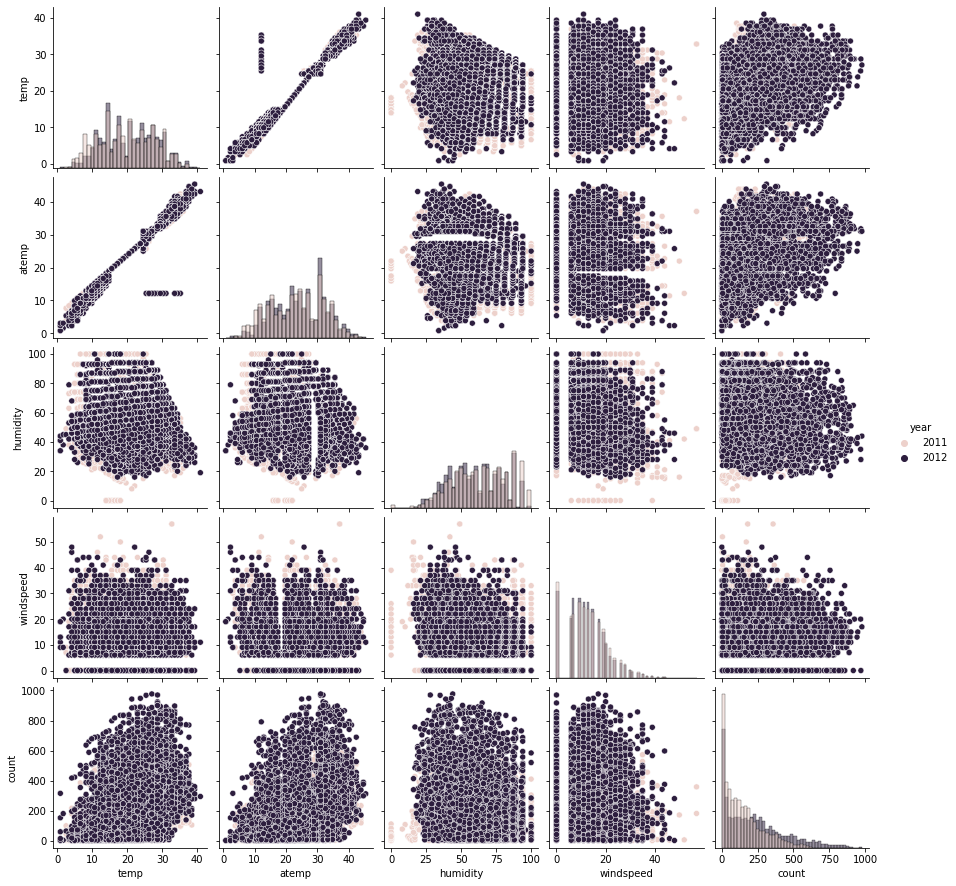

In [15]:
sns.pairplot(train[['year', 'temp','atemp','humidity','windspeed','count']], hue="year", diag_kind="hist")